# 기본 세팅

In [ ]:
!pip install sec_edgar_api --quiet
!pip install sec_cik_mapper --quiet

In [ ]:
from sec_edgar_api import EdgarClient
from datetime import datetime, timedelta
from sec_cik_mapper import StockMapper
from statsmodels.tsa.stattools import adfuller, kpss
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import io
import csv
import json

stock_mapper = StockMapper()

In [ ]:
mega_cap_tickers = set([
    "AAPL", "MSFT", "AMZN","TSLA", "GOOG", "META", "BRK-B", "JNJ", "V", "WMT",
    "PG", "MA", "NVDA", "HD", "DIS", "BAC", "UNH",
    "KO", "MRK", "CSCO", "NKE", "CRM", "ABT", "CVX", "XOM",
    "ORCL", "LLY", "ACN", "ABBV", "MCD", "TMO", "COST",
    "PM", "IBM", "QCOM",
    "CAT", "USB", "RTX", "GD", "NOW",
    "ZTS", "APD", "MMM", "FIS", "ITW",
    "GE", "EMR", "PNC", "ECL", "AON", "ADM", "NSC",
    "MMC", "FDX", "CSX", "UPS", "DD", "PH",
])
print(len(mega_cap_tickers))

59


In [ ]:
large_cap_tickers = set([
    "PLTR", "VZ", "HSBC", "ISRG", "MS", "AXP", "PGR",
    "INTU", "AMGN", "GS", "RY", "BX", "HDB", "PDD", "UL",
    "ADBE", "AMD", "SPGI", "TXN", "NEE", "UBER", "BKNG", "BSX",
    "DHR", "SYK", "TJX", "GILD", "TTE", "SONY", "BLK", "PFE", "SCHW", "UNP",
    "SNY", "CMCSA", "HON", "MUFG", "BUD", "LOW", "VRTX", "ADP", "FI", "DE",
    "COP", "CB", "C", "BHP", "BMY", "SPOT", "BA", "MDT", "IBN",
    "AMAT", "PANW", "LMT", "AMT", "SHOP", "TD", "ARM", "ELV", "ETN", "SO",
    "SAN", "RIO", "SBUX", "ENB", "MELI", "MO", "INTC", "WELL", "CME", "DUK",
    "ICE", "PLD", "WM", "RELX", "CI", "BTI", "KKR", "UBS", "SMFG", "ANET",
    "MCK", "ADI", "APP", "AJG", "MDLZ", "PBR", "CRWD", "HCA", "SHW"
])
mid_cap_tickers = set([
    "SWK", "MRNA", "DOX", "GMED", "JEF", "ATR", "PR", "SAIL", "SN", "ITT",
    "PAC", "VTRS", "CAVA", "KEP", "STN", "MUSA", "ORI", "BEPC", "DTM", "NICE",
    "WBA", "MGA", "HESM", "LTM", "BRBR", "GME", "HST", "PAG", "CUBE", "APG",
    "CNM", "SEIC", "PCOR", "MEDP", "OGE", "RRC", "HMY", "IPG", "PRI", "AOS",
    "SWKS", "VNOM", "CHE", "ALAB", "ARMK", "ASND", "FYBR", "SF", "DAY", "UWMC",
    "PAAS", "EPAM", "FHN", "X", "ROKU", "CACI", "INGR", "MTZ", "BWXT", "QGEN",
    "WIX", "DRS", "TECH", "DSGX", "EGP", "AM", "G", "ASR", "ESTC", "SSB",
    "SARO", "MRNO", "AGNC", "SAIA", "TLN", "AES", "CELH", "COOP", "REXR", "WF",
    "LW", "MLI", "CR", "BIRK", "CORT", "KT", "COHR", "SNX", "CRS", "AIT",
    "BLD", "ERJ", "BZ", "HSIC", "PLNT", "ADC", "SKM", "MOS", "EXAS", "MASI"
])
small_cap_tickers = set([
    "SBCF", "STRA", "MQ", "DFH", "FLOC", "LGND", "AGYS", "PGNY", "NAMS", "KWR",
    "PK", "TGI", "VNET", "RNST", "AESI", "CCS", "WRBY", "PBF", "SOC", "TRMK",
    "RXRX", "STC", "ENOV", "AMBA", "TTMI", "ARQT", "FIVN", "WSBC", "ATKR", "SYBT",
    "UEC", "AGM", "SAH", "TARS", "AIR", "ENLT", "NEXT", "NATL", "NFE", "GLP",
    "BB", "NBTB", "PLTK", "FSM", "HTH", "MTX", "NVCR", "BBUC", "DNLI", "LMAT",
    "SJW", "LGF-B", "FIHL", "ROOT", "ARDT", "TRIP", "ADUS", "GEL", "SUPN",
    "DAN", "EFSC", "MNR", "AEO", "ECG", "AMBP", "GNL", "CVI", "CLOV", "PSEC",
    "EVCM", "HE", "CNMD", "MYRG", "PINC", "HRMY", "CRTO", "MSDL", "GB", "SXI",
    "CPRI", "NEOG", "HMN", "BKE", "AGX", "CDLR", "SPB", "NWN", "CNTA", "HBI",
    "SHO", "CMBT", "TWFG", "OI", "BKV", "IHS", "KLG", "SHOO", "PRDO", "CC"
])
micro_cap_tickers = set([
    "ALLO", "AMPX", "POLE", "LOCO", "TATT", "VCIC", "JACS", "NNOX", "CZNC", "NIU",
    "MFH", "ATNI", "LE", "PDLB", "RNGR", "TRVG", "GRAF", "VSTM", "LPAA", "SOUL",
    "TDUP", "ACTG", "GSRT", "EM", "IVA", "LPBB", "LZM", "HCAT", "ATXS", "UIS",
    "MATV", "CIVB", "PANL", "AURA", "OTLY", "HLLY", "RM", "LXFR", "MXCT", "ABSI",
    "NODK", "VPG", "NVEC", "BBCP", "MTW", "GHI", "KGEI", "MVIS", "GPRE", "PBFS",
    "PBPB", "KULR", "LANV", "MPX", "DOMO", "VMD", "AIRJ", "NEN", "PKOH", "MCFT",
    "QUAD", "FERA", "FSBW", "RBB", "CLCO", "AMCX", "SHYF", "PVLA", "AACB", "NRC",
    "BRBS", "KLTR", "OABI", "SZZL", "ZIMV", "OIS", "CYRX", "APPS", "TPVG", "LAES",
    "EVTL", "AIP", "MNTK", "LUNG", "GWRS", "NYXH", "UAMY", "TTSH", "QSG", "FC",
    "BCML", "BIOX", "FNLC", "DMRC", "AUDC", "CBAN", "GOCO", "SLDB", "MTLS", "CEPO"
])

In [ ]:
print(len(large_cap_tickers))
print(len(small_cap_tickers))
print(len(micro_cap_tickers))

91
99
100


In [ ]:
def get_stock_price_history(ticker, start_date=None, end_date=None):
  if not start_date:
    start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
  if not end_date:
    end_date = datetime.now().strftime('%Y-%m-%d')

  try:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    price_history = {}
    for date, row in hist.iterrows():
      price_history[date.strftime('%Y-%m-%d')] = row['Close']

    return price_history
  except Exception as e:
    print(f"Error fetching stock price data: {str(e)}")
    return None

In [ ]:
# 기업들 별로 오픈, 하이, 로우, 클로즈 각각의 가격에 대해 상관관계 표 생성
def concat_data(tickers, start_date, end_date):
  concat_lst=[]
  for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    # hist = hist.reset_index()
    hist.index = hist.index.strftime('%Y-%m-%d')
    hist=hist.rename(columns={
      # 'Date': f'{ticker}_Date',
      'Open': f'{ticker}_Open',
      'High': f'{ticker}_High',
      'Low': f'{ticker}_Low',
      'Close': f'{ticker}_Close',
      'Volume': f'{ticker}_Volume',
    })
    # hist[f'{ticker}_Date']=hist[f'{ticker}_Date'].dt.strftime('%Y-%m-%d')
    hist = hist.drop(columns=['Dividends', 'Stock Splits'])
    concat_lst.append(hist)
  return pd.concat(concat_lst,axis=1)

In [ ]:
def compute_stats(row):
  filtered = row.drop(row.name) # 본인 제외
  return pd.Series({
    'mean': filtered.mean(),
    # 'median': filtered.median(),
    # 'median_tick':filtered.,
    'std': filtered.std(),
    'max': filtered.max(),
    'max_tick':filtered.idxmax(),
    'min': filtered.min(),
    'min_tick':filtered.idxmin(),

  })

In [ ]:
def see_all(row=True,col=True):
  # 모든 행, 열 보기 설정
  import pandas as pd

  # 모든 행 출력 설정
  if row:
    pd.set_option('display.max_rows', None)
  else:
    pd.reset_option('display.max_rows') # 행 기본값: 60
  # 모든 열 출력 설정
  if col:
    pd.set_option('display.max_columns', None) # 열 기본값: 20
  else:
    pd.reset_option('display.max_columns')
  # 셀 내용 생략 없이 출력 (긴 텍스트 포함)
  # pd.set_option('display.max_colwidth', None)

In [ ]:
start_date='2020-01-01'
end_date='2025-04-01'
# ticker='AAPL'
# stock = yf.Ticker(ticker)
# hist = stock.history(start=start_date, end=end_date)
# hist = hist.reset_index()
# hist=hist[['Date','Open','High','Low','Close','Volume']]
# hist['Date']=hist['Date'].dt.strftime('%Y-%m-%d')
# hist

In [ ]:
mega_concated_df=concat_data(mega_cap_tickers, start_date=start_date, end_date=end_date)
mega_concated_df

,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Volume,USB_Open,USB_High,USB_Low,USB_Close,USB_Volume,...,MMC_Open,MMC_High,MMC_Low,MMC_Close,MMC_Volume,MCD_Open,MCD_High,MCD_Low,MCD_Close,MCD_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,67.099702,68.108376,67.004158,68.108376,27278000,47.375533,47.383498,47.009081,47.160442,5002100,...,102.760177,103.183784,102.327373,103.183784,2014000,175.343677,177.823287,175.175415,177.814423,3554200
2020-01-03,67.079297,68.360669,67.045454,67.752075,23408000,46.602814,46.849770,46.220432,46.610779,5161800,...,102.189254,103.220627,102.060332,103.027245,1486500,176.574651,177.601920,176.096447,177.185699,2767600
2020-01-06,67.259926,69.583321,67.228582,69.557945,46768000,45.463630,46.037204,45.264473,45.973473,6869200,...,102.520778,103.091715,102.272138,103.054886,1344400,176.760609,179.567877,176.539215,179.178223,4660400
2020-01-07,69.689821,69.841098,69.246938,69.423592,34330000,45.830076,45.957537,45.519391,45.535324,4006800,...,102.898322,103.377180,102.410261,102.741776,1014000,178.770864,179.488177,177.566482,179.443909,4047400
2020-01-08,69.409154,70.256604,69.300178,69.917725,35314000,45.567196,45.814149,45.431767,45.439735,5627500,...,102.806232,103.460051,102.410256,102.437881,1327300,179.435040,183.039334,179.063101,182.348587,5284200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,168.979996,170.630005,168.320007,170.559998,24174400,43.262016,43.509058,42.975450,43.182964,7377800,...,236.346756,237.054388,233.974712,235.828491,1444400,306.929993,308.660004,304.029999,306.920013,2657100
2025-03-26,169.000000,169.610001,164.839996,165.059998,28901600,43.400359,43.933971,43.064386,43.252136,9585400,...,236.197262,238.429760,236.167364,238.001205,1873700,307.899994,314.059998,307.790009,313.579987,2624400
2025-03-27,164.630005,165.419998,162.000000,162.240005,24508300,43.222489,43.380596,42.619706,42.718521,8171600,...,239.197182,243.074170,237.831770,242.595779,2507400,315.160004,316.640015,310.679993,312.690002,3119500


In [ ]:
large_concated_df=concat_data(large_cap_tickers, start_date=start_date, end_date=end_date)
mid_concated_df=concat_data(mid_cap_tickers, start_date=start_date, end_date=end_date)
small_concated_df=concat_data(small_cap_tickers, start_date=start_date, end_date=end_date)

In [ ]:
print(mega_concated_df.isna().sum().sum())
print(large_concated_df.isna().sum().sum())
print(mid_concated_df.isna().sum().sum())
print(small_concated_df.isna().sum().sum())

0
7210
58785
91765


In [ ]:
small_concated_df[small_concated_df.isna()]

,AMBA_Open,AMBA_High,AMBA_Low,AMBA_Close,AMBA_Volume,HTH_Open,HTH_High,HTH_Low,HTH_Close,HTH_Volume,...,CNTA_Open,CNTA_High,CNTA_Low,CNTA_Close,CNTA_Volume,ARQT_Open,ARQT_High,ARQT_Low,ARQT_Close,ARQT_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mega_open_cols = [col for col in mega_concated_df.columns if col.endswith('_Open')]
mega_high_cols = [col for col in mega_concated_df.columns if col.endswith('_High')]
mega_low_cols = [col for col in mega_concated_df.columns if col.endswith('_Low')]
mega_close_cols = [col for col in mega_concated_df.columns if col.endswith('_Close')]
mega_volume_cols = [col for col in mega_concated_df.columns if col.endswith('_Volume')]

large_open_cols = [col for col in large_concated_df.columns if col.endswith('_Open')]
large_high_cols = [col for col in large_concated_df.columns if col.endswith('_High')]
large_low_cols = [col for col in large_concated_df.columns if col.endswith('_Low')]
large_close_cols = [col for col in large_concated_df.columns if col.endswith('_Close')]
large_volume_cols = [col for col in large_concated_df.columns if col.endswith('_Volume')]

mid_open_cols = [col for col in mid_concated_df.columns if col.endswith('_Open')]
mid_high_cols = [col for col in mid_concated_df.columns if col.endswith('_High')]
mid_low_cols = [col for col in mid_concated_df.columns if col.endswith('_Low')]
mid_close_cols = [col for col in mid_concated_df.columns if col.endswith('_Close')]
mid_volume_cols = [col for col in mid_concated_df.columns if col.endswith('_Volume')]

small_open_cols = [col for col in small_concated_df.columns if col.endswith('_Open')]
small_high_cols = [col for col in small_concated_df.columns if col.endswith('_High')]
small_low_cols = [col for col in small_concated_df.columns if col.endswith('_Low')]
small_close_cols = [col for col in small_concated_df.columns if col.endswith('_Close')]
small_volume_cols = [col for col in small_concated_df.columns if col.endswith('_Volume')]

In [ ]:
see_all(row=False,col=False)

In [ ]:
# mega_concated_df_open=mega_concated_df[mega_open_cols]
# mega_concated_df_high=mega_concated_df[mega_high_cols]
# mega_concated_df_low=mega_concated_df[mega_low_cols]
mega_concated_df_close=mega_concated_df[mega_close_cols]
mega_concated_df_volume=mega_concated_df[mega_volume_cols]

large_concated_df_close=large_concated_df[large_close_cols]
large_concated_df_volume=large_concated_df[large_volume_cols]

mid_concated_df_close=mid_concated_df[mid_close_cols]
mid_concated_df_volume=mid_concated_df[mid_volume_cols]

small_concated_df_close=small_concated_df[small_close_cols]
small_concated_df_volume=small_concated_df[small_volume_cols]

In [ ]:
mega_concated_df_close_log = np.log(mega_concated_df_close)
large_concated_df_close_log = np.log(large_concated_df_close)
mid_concated_df_close_log = np.log(mid_concated_df_close)
small_concated_df_close_log = np.log(small_concated_df_close)

In [ ]:
mega_concated_df_close_log_chg=mega_concated_df_close_log.diff(periods=1,axis=0)
mega_concated_df_close_log_chg

,GOOGL_Close,USB_Close,TSLA_Close,PG_Close,QCOM_Close,ZTS_Close,AON_Close,V_Close,PH_Close,AMZN_Close,...,META_Close,IBM_Close,NOW_Close,ITW_Close,DIS_Close,UNH_Close,NKE_Close,NVDA_Close,MMC_Close,MCD_Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.005245,-0.011724,0.029203,-0.006748,-0.019009,0.000149,-0.003935,-0.007985,-0.014163,-0.012213,...,-0.005305,-0.008007,-0.000481,-0.014247,-0.011537,-0.010171,-0.002744,-0.016135,-0.001518,-0.003542
2020-01-06,0.026305,-0.013767,0.019072,0.001386,-0.005878,-0.007707,0.002881,-0.002165,0.000435,0.014776,...,0.018658,-0.001788,0.006062,-0.003187,-0.005819,0.006918,-0.000883,0.004185,0.000268,0.011183
2020-01-07,-0.001933,-0.009576,0.038067,-0.006211,0.028039,0.003375,-0.008522,-0.002646,-0.002032,0.002089,...,0.002161,0.000671,0.000137,-0.004097,0.000343,-0.006055,-0.000491,0.012034,-0.003043,0.001482
2020-01-08,0.007092,-0.002101,0.048033,0.004254,-0.002927,-0.002174,0.004102,0.016973,0.000678,-0.007839,...,0.010087,0.008312,0.009311,0.005217,-0.002061,0.020865,-0.002262,0.001873,-0.002962,0.016057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,0.017030,-0.001372,0.034423,-0.017048,0.000437,-0.011527,0.007577,0.002179,0.013571,0.011982,...,0.011983,0.005819,0.013617,-0.002546,0.014173,-0.005962,-0.012693,-0.005948,0.008488,0.004081
2025-03-26,-0.032778,0.001601,-0.057424,0.022646,-0.011050,0.009379,0.001488,-0.001278,-0.021492,-0.022516,...,-0.024781,0.001759,-0.026862,0.003523,-0.008202,0.009248,-0.012096,-0.059134,0.009171,0.021467
2025-03-27,-0.017232,-0.012414,0.003925,0.012706,-0.002655,0.013421,0.007058,0.016368,-0.017804,0.001143,...,-0.013844,-0.016635,-0.012975,-0.015477,-0.003280,-0.004797,0.000912,-0.020694,0.019121,-0.002842


In [ ]:
# mega_concated_df_close_log_chg.describe()

In [ ]:
large_concated_df_close_log = np.log(large_concated_df_close)
mid_concated_df_close_log = np.log(mid_concated_df_close)
small_concated_df_close_log = np.log(small_concated_df_close)

large_concated_df_close_log_chg=large_concated_df_close_log.diff(periods=1,axis=0)
mid_concated_df_close_log_chg=mid_concated_df_close_log.diff(periods=1,axis=0)
small_concated_df_close_log_chg=small_concated_df_close_log.diff(periods=1,axis=0)

<Figure size 1200x600 with 0 Axes>

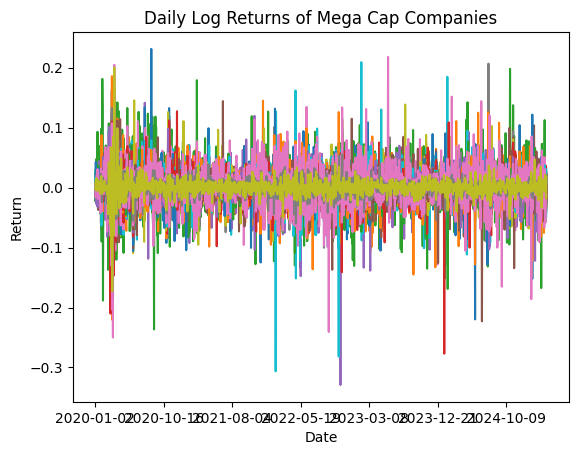

In [ ]:
plt.figure(figsize=(12, 6))
mega_concated_df_close_log_chg.plot(legend=False)
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Daily Log Returns of Mega Cap Companies")
plt.show()

In [ ]:
# open, high, low, close 별 차이 없음
# fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# sns.heatmap(mega_concated_df_open.corr(), ax=axs[0, 0], annot=True, cmap='coolwarm')
# axs[0, 0].set_title('Correlation Matrix 1')
# sns.heatmap(mega_concated_df_high.corr(), ax=axs[0, 1], annot=True, cmap='coolwarm')
# axs[0, 1].set_title('Correlation Matrix 2')
# sns.heatmap(mega_concated_df_low.corr(), ax=axs[1, 0], annot=True, cmap='coolwarm')
# axs[1, 0].set_title('Correlation Matrix 3')
# sns.heatmap(mega_concated_df_close.corr(), ax=axs[1, 1], annot=True, cmap='coolwarm')
# axs[1, 1].set_title('Correlation Matrix 4')

# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(16, 12))
# sns.heatmap(mega_concated_df_close.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
mega_close_corr_mat = mega_concated_df_close.corr()
mega_stats_df = mega_close_corr_mat.apply(compute_stats, axis=1)
print(mega_stats_df)

                 mean       std       max     max_tick       min   min_tick
GOOGL_Close  0.702320  0.275679  0.999784   GOOG_Close -0.430689  FIS_Close
USB_Close    0.402265  0.184420  0.906625    PNC_Close -0.101553  MRK_Close
TSLA_Close   0.510481  0.178243  0.765994    ACN_Close -0.257336  FIS_Close
PG_Close     0.691377  0.326469  0.946594  BRK-B_Close -0.622295  FIS_Close
QCOM_Close   0.622076  0.210214  0.838801  GOOGL_Close -0.251502  FIS_Close
ZTS_Close    0.484619  0.181151  0.810752    ACN_Close -0.210394  FIS_Close
AON_Close    0.649795  0.330840  0.939798    MMC_Close -0.741704  FIS_Close
V_Close      0.662220  0.322715  0.984323     MA_Close -0.431495  FIS_Close
PH_Close     0.684053  0.347049  0.976192    CAT_Close -0.525521  FIS_Close
AMZN_Close   0.499744  0.248278  0.895916    CRM_Close -0.316824  ADM_Close
COST_Close   0.677599  0.353694  0.960076  BRK-B_Close -0.564668  FIS_Close
HD_Close     0.712299  0.267395  0.929005    ACN_Close -0.440712  FIS_Close
RTX_Close   

In [ ]:
large_close_corr_mat = large_concated_df_close.corr()
large_stats_df = large_close_corr_mat.apply(compute_stats, axis=1)

mid_close_corr_mat = mid_concated_df_close.corr()
mid_stats_df = mid_close_corr_mat.apply(compute_stats, axis=1)

small_close_corr_mat = small_concated_df_close.corr()
small_stats_df = small_close_corr_mat.apply(compute_stats, axis=1)

In [ ]:
# 최근 상장된 종목들의 경우 과거 데이터가 NaN
# small_concated_df_close.loc[:, small_concated_df_close.columns.str.contains('ECG_Close')].isna().sum()

In [ ]:
small_close_corr_mat

,AMBA_Close,HTH_Close,TRMK_Close,SOC_Close,ENOV_Close,AEO_Close,GEL_Close,TARS_Close,RNST_Close,CNMD_Close,...,CC_Close,HMN_Close,SYBT_Close,DNLI_Close,MYRG_Close,WRBY_Close,PINC_Close,LGND_Close,CNTA_Close,ARQT_Close
AMBA_Close,1.000000,0.450820,0.237771,-0.302821,0.783752,0.460311,-0.064986,-0.034543,0.478178,0.727991,...,0.394888,0.216157,0.240260,0.555674,0.020685,0.876470,0.618468,0.249573,0.262549,0.259426
HTH_Close,0.450820,1.000000,0.582665,0.189673,0.404787,0.679235,0.590799,0.286724,0.786641,0.435340,...,0.628539,0.348842,0.593994,0.194838,0.719960,0.407757,-0.141776,0.536659,0.526987,-0.437075
TRMK_Close,0.237771,0.582665,1.000000,0.626227,0.027556,0.336324,0.572179,0.546427,0.845445,-0.083966,...,0.108752,0.765405,0.862643,0.007945,0.371537,0.316847,-0.075028,0.650114,0.409520,-0.137639
SOC_Close,-0.302821,0.189673,0.626227,1.000000,-0.599204,-0.079268,0.604177,0.790703,0.314800,-0.639358,...,-0.780818,0.563360,0.566015,-0.349722,0.340380,0.002048,-0.591068,0.784760,0.445998,-0.269149
ENOV_Close,0.783752,0.404787,0.027556,-0.599204,1.000000,0.616796,-0.145869,-0.141331,0.395840,0.865231,...,0.515015,0.161051,-0.044419,0.671094,-0.065185,0.689263,0.648946,0.002960,0.269829,0.359981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRBY_Close,0.876470,0.407757,0.316847,0.002048,0.689263,0.461373,-0.120817,0.201921,0.476508,0.499344,...,-0.039738,0.377790,0.280034,0.729397,-0.205639,1.000000,0.474925,0.351246,0.488892,0.449232
PINC_Close,0.618468,-0.141776,-0.075028,-0.591068,0.648946,0.010699,-0.465742,-0.389244,0.104588,0.578617,...,0.278701,0.031925,-0.036714,0.546974,-0.531015,0.474925,1.000000,-0.312425,-0.095040,0.671473
LGND_Close,0.249573,0.536659,0.650114,0.784760,0.002960,0.407773,0.373440,0.746084,0.580541,-0.091826,...,-0.132905,0.536529,0.543156,0.084529,0.387041,0.351246,-0.312425,1.000000,0.619067,-0.116361
CNTA_Close,0.262549,0.526987,0.409520,0.445998,0.269829,0.733689,0.069375,0.694881,0.465580,0.052097,...,-0.405362,0.505225,0.142141,0.512734,0.061515,0.488892,-0.095040,0.619067,1.000000,0.256225


In [ ]:
print(large_stats_df)

                mean       std       max    max_tick       min    min_tick
AXP_Close   0.685217  0.336899  0.970869   KKR_Close -0.641030  INTC_Close
MO_Close    0.653133  0.325699  0.936556  WELL_Close -0.700178  INTC_Close
PBR_Close   0.562799  0.392570  0.960081   MCK_Close -0.698792  INTC_Close
AMAT_Close  0.643874  0.302479  0.922710   ADI_Close -0.439766  INTC_Close
SONY_Close  0.489088  0.177979  0.791562   BLK_Close -0.113877  INTC_Close
...              ...       ...       ...         ...       ...         ...
ANET_Close  0.637886  0.379524  0.969418  RELX_Close -0.691879  INTC_Close
SMFG_Close  0.633453  0.365970  0.983731  MUFG_Close -0.620130  INTC_Close
AMT_Close  -0.084866  0.253068  0.627692   MDT_Close -0.502145   PBR_Close
RIO_Close   0.554010  0.245698  0.945694   BHP_Close -0.401652  INTC_Close
NEE_Close   0.311360  0.191292  0.706363   DHR_Close -0.401404  INTC_Close

[91 rows x 6 columns]


In [ ]:
print(mid_stats_df)

                mean       std       max    max_tick       min    min_tick
SN_Close    0.463967  0.523245  0.958783  ARMK_Close -0.920119   WBA_Close
CRS_Close   0.413307  0.505842  0.979169   TLN_Close -0.832009   WBA_Close
EPAM_Close  0.040887  0.417754  0.854473    BZ_Close -0.549060   DTM_Close
ERJ_Close   0.427056  0.479109  0.944046   CRS_Close -0.733543   WBA_Close
DTM_Close   0.361927  0.549918  0.985674   TLN_Close -0.824761   WBA_Close
...              ...       ...       ...         ...       ...         ...
UWMC_Close  0.065267  0.355961  0.801477  SAIL_Close -0.848391   MOS_Close
SEIC_Close  0.472840  0.435004  0.924434   TLN_Close -0.721142  SARO_Close
SF_Close    0.517121  0.440109  0.971704   TLN_Close -0.616608   WBA_Close
SWKS_Close -0.021315  0.469948  0.903665  ROKU_Close -0.916580   LTM_Close
PAC_Close   0.376085  0.516927  0.948092   ASR_Close -0.721917    BZ_Close

[100 rows x 6 columns]


In [ ]:
print(small_stats_df[:100])

                mean       std       max    max_tick       min    min_tick
AMBA_Close  0.246315  0.367080  0.876470  WRBY_Close -0.557916  STRA_Close
HTH_Close   0.315805  0.356787  0.872783  CRTO_Close -0.517269  STRA_Close
TRMK_Close  0.312533  0.336897  0.888190  WSBC_Close -0.390682  ARDT_Close
SOC_Close   0.117323  0.501869  0.938593   AGX_Close -0.780818    CC_Close
ENOV_Close  0.206166  0.456704  0.921963  FLOC_Close -0.660495  CDLR_Close
...              ...       ...       ...         ...       ...         ...
WRBY_Close  0.271950  0.417174  0.890969   BKV_Close -0.774815   CVI_Close
PINC_Close  0.035908  0.485337  0.899474    HE_Close -0.788648  PRDO_Close
LGND_Close  0.281656  0.325639  0.805871  NATL_Close -0.431888    HE_Close
CNTA_Close  0.274114  0.349844  0.892570  ROOT_Close -0.630834   CVI_Close
ARQT_Close  0.005177  0.515597  0.805289  VNET_Close -0.822165   AGM_Close

[99 rows x 6 columns]


In [ ]:
# 상관계수 크기순으로
# aapl_corr = close_corr_mat.loc["AAPL_Close"]
# sorted_aapl_corr = aapl_corr.sort_values(ascending=False)
# sorted_aapl_corr

In [ ]:
all_concat_volume_df=pd.concat([mega_concated_df_volume,large_concated_df_volume,mid_concated_df_volume,small_concated_df_volume],axis=1)
all_concat_volume_df

,GOOGL_Volume,USB_Volume,TSLA_Volume,PG_Volume,QCOM_Volume,ZTS_Volume,AON_Volume,V_Volume,PH_Volume,AMZN_Volume,...,CC_Volume,HMN_Volume,SYBT_Volume,DNLI_Volume,MYRG_Volume,WRBY_Volume,PINC_Volume,LGND_Volume,CNTA_Volume,ARQT_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,27278000,5002100,142981500,8130800,8413900,1576700,830100,8733000,845200,80580000,...,2301000,149100,49400,258700,45700,NaN,684900,344324,NaN,NaN
2020-01-03,23408000,5161800,266677500,7970500,8340300,1274000,501700,4899700,895400,75288000,...,3319300,191500,37900,249300,72400,NaN,849100,517288,NaN,NaN
2020-01-06,46768000,6869200,151995000,6674400,8381400,2334100,740600,10109500,734100,81236000,...,1850500,157200,35100,323800,49000,NaN,592000,364522,NaN,NaN
2020-01-07,34330000,4006800,268231500,7583400,8377400,1224500,495500,4392300,699500,80898000,...,1824300,160600,53400,561200,33500,NaN,513700,463908,NaN,NaN
2020-01-08,35314000,5627500,467164500,5385100,7619900,1766700,691700,5712000,711500,70160000,...,2045300,134800,51900,438400,29400,NaN,377700,496930,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,24174400,7377800,150361500,8366700,3978200,1583800,839200,3931200,903700,31171200,...,1793400,170900,88100,936500,164200,1976100.0,1356800,164800,785400.0,3093800.0
2025-03-26,28901600,9585400,153629800,7756000,5960300,2078200,884100,6187100,953500,32855300,...,1801900,140800,81800,796100,157000,1779200.0,1053700,86300,2499400.0,1557300.0
2025-03-27,24508300,8171600,162572100,6211700,6102000,1590500,1528000,7254800,628200,27317700,...,2437000,127000,95600,654300,143200,1004000.0,769500,131200,675600.0,1460900.0


In [ ]:
all_concat_close_df=pd.concat([mega_concated_df_close,large_concated_df_close,mid_concated_df_close,small_concated_df_close],axis=1)
all_concat_close_df

,GOOGL_Close,USB_Close,TSLA_Close,PG_Close,QCOM_Close,ZTS_Close,AON_Close,V_Close,PH_Close,AMZN_Close,...,CC_Close,HMN_Close,SYBT_Close,DNLI_Close,MYRG_Close,WRBY_Close,PINC_Close,LGND_Close,CNTA_Close,ARQT_Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,68.108376,47.160442,28.684000,108.419884,78.958733,128.819458,200.509705,184.177429,194.108643,94.900497,...,14.572001,36.753742,36.403896,16.389999,32.430000,NaN,31.565302,65.339989,NaN,NaN
2020-01-03,67.752075,46.610779,29.534000,107.690697,77.471962,128.838684,199.722275,182.712646,191.378922,93.748497,...,13.598385,36.961487,36.137852,16.150000,32.610001,NaN,31.175394,63.112911,NaN,NaN
2020-01-06,69.557945,45.973473,30.102667,107.840042,77.017921,127.849510,200.298462,182.317520,191.462158,95.143997,...,13.839779,36.703888,36.111248,17.290001,32.349998,NaN,31.305367,63.218964,NaN,NaN
2020-01-07,69.423592,45.535324,31.270666,107.172356,79.208023,128.281677,198.598694,181.835678,191.073517,95.343002,...,13.743222,36.039101,35.862938,18.799999,31.799999,NaN,31.166742,61.746723,NaN,NaN
2020-01-08,69.917725,45.439735,32.809334,107.629211,78.976540,128.003159,199.414963,184.948380,191.203049,94.598503,...,13.831733,36.205299,36.128979,19.260000,31.500000,NaN,31.123415,60.773548,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,170.559998,43.182964,288.140015,162.850006,160.149994,161.300003,396.140015,344.619995,651.359985,205.710007,...,14.150000,42.200001,70.019997,14.120000,128.970001,20.160000,18.950001,109.690002,15.81,17.110001
2025-03-26,165.059998,43.252136,272.059998,166.580002,158.389999,162.820007,396.730011,344.179993,637.510010,201.130005,...,13.830000,42.580002,70.099998,13.810000,120.970001,19.469999,19.020000,108.089996,14.54,16.469999
2025-03-27,162.240005,42.718521,273.130005,168.710007,157.970001,165.020004,399.540009,349.859985,626.260010,201.360001,...,14.290000,43.119999,69.839996,14.200000,115.669998,19.000000,19.190001,109.699997,14.51,16.090000


In [ ]:
all_concat_close_df_corr_mat=all_concat_close_df.corr()
all_concat_close_df_corr_mat

,GOOGL_Close,USB_Close,TSLA_Close,PG_Close,QCOM_Close,ZTS_Close,AON_Close,V_Close,PH_Close,AMZN_Close,...,CC_Close,HMN_Close,SYBT_Close,DNLI_Close,MYRG_Close,WRBY_Close,PINC_Close,LGND_Close,CNTA_Close,ARQT_Close
GOOGL_Close,1.000000,0.518014,0.691288,0.869914,0.838801,0.660393,0.792076,0.848907,0.874695,0.742697,...,0.224860,0.392077,0.598385,-0.196425,0.815952,0.241068,-0.522276,0.658441,0.592676,-0.616305
USB_Close,0.518014,1.000000,0.589442,0.314533,0.544344,0.558303,0.325676,0.340992,0.322141,0.467913,...,0.311442,0.709587,0.598049,0.328954,0.250363,0.716608,0.243438,0.501064,0.652528,0.052467
TSLA_Close,0.691288,0.589442,1.000000,0.560989,0.620075,0.674274,0.616161,0.453068,0.480335,0.533638,...,0.470907,0.379947,0.689092,0.173440,0.562647,0.618374,0.029421,0.498534,0.330651,-0.262989
PG_Close,0.869914,0.314533,0.560989,1.000000,0.785415,0.569738,0.875848,0.843818,0.894949,0.545395,...,0.245269,0.305231,0.612297,-0.373758,0.818505,-0.083752,-0.588878,0.538808,0.221207,-0.762253
QCOM_Close,0.838801,0.544344,0.620075,0.785415,1.000000,0.638545,0.563206,0.677222,0.731284,0.711676,...,0.280664,0.438910,0.543847,0.029606,0.650245,0.250727,-0.329966,0.587658,0.392729,-0.432660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRBY_Close,0.241068,0.716608,0.618374,-0.083752,0.250727,0.617774,-0.064653,-0.102492,-0.146116,0.345656,...,-0.039738,0.377790,0.280034,0.729397,-0.205639,1.000000,0.474925,0.351246,0.488892,0.449232
PINC_Close,-0.522276,0.243438,0.029421,-0.588878,-0.329966,0.010442,-0.491479,-0.714837,-0.752448,-0.384441,...,0.278701,0.031925,-0.036714,0.546974,-0.531015,0.474925,1.000000,-0.312425,-0.095040,0.671473
LGND_Close,0.658441,0.501064,0.498534,0.538808,0.587658,0.376058,0.498248,0.671578,0.677446,0.715497,...,-0.132905,0.536529,0.543156,0.084529,0.387041,0.351246,-0.312425,1.000000,0.619067,-0.116361
CNTA_Close,0.592676,0.652528,0.330651,0.221207,0.392729,0.474031,0.126867,0.479687,0.372658,0.774532,...,-0.405362,0.505225,0.142141,0.512734,0.061515,0.488892,-0.095040,0.619067,1.000000,0.256225


In [ ]:
all_concat_stats_df = all_concat_close_df_corr_mat.apply(compute_stats, axis=1)
all_concat_stats_df

,mean,std,max,max_tick,min,min_tick
GOOGL_Close,0.520310,0.415096,0.999784,GOOG_Close,-0.736873,SARO_Close
USB_Close,0.389680,0.228785,0.936603,SAIL_Close,-0.373588,STRA_Close
TSLA_Close,0.396147,0.257051,0.921194,FLOC_Close,-0.764751,SARO_Close
PG_Close,0.468991,0.484395,0.946594,BRK-B_Close,-0.762253,ARQT_Close
QCOM_Close,0.467806,0.326011,0.875740,STC_Close,-0.564411,NWN_Close
...,...,...,...,...,...,...
WRBY_Close,0.152638,0.404948,0.914837,ROKU_Close,-0.804020,SARO_Close
PINC_Close,-0.213513,0.474708,0.899474,HE_Close,-0.869068,VRTX_Close
LGND_Close,0.424509,0.292066,0.936990,TLN_Close,-0.431888,HE_Close
CNTA_Close,0.315253,0.324469,0.948752,TLN_Close,-0.774511,ADM_Close


테스트

In [ ]:
see_all(row=False,col=False)

In [ ]:
aapl_corr = all_concat_close_df_corr_mat.loc["AAPL_Close"]
sorted_aapl_corr = aapl_corr.sort_values(ascending=False)
sorted_aapl_corr

,AAPL_Close
AAPL_Close,1.000000
PANW_Close,0.943577
AM_Close,0.942196
MMC_Close,0.941967
PG_Close,0.941669
...,...
PLTK_Close,-0.647450
HE_Close,-0.684324
INTC_Close,-0.699520
WBA_Close,-0.737245


In [ ]:
all_concat_log_df=pd.concat([mega_concated_df_close_log,large_concated_df_close_log,mid_concated_df_close_log,small_concated_df_close_log],axis=1)
all_concat_log_df.index=pd.to_datetime(all_concat_log_df.index)

In [ ]:
type(all_concat_log_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
all_concat_log_chg_df=pd.concat([mega_concated_df_close_log_chg,large_concated_df_close_log_chg,mid_concated_df_close_log_chg,small_concated_df_close_log_chg],axis=1)
all_concat_log_chg_df.index=pd.to_datetime(all_concat_log_chg_df.index)

# 개별 종목에 대하여

In [ ]:
aapl_log_return=all_concat_log_chg_df['AAPL_Close']
am_log_return=all_concat_log_chg_df['AM_Close']

In [ ]:
type(am_log_return.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
all_concat_close_df_corr_mat.loc['AAPL_Close']

,AAPL_Close
GOOGL_Close,0.906503
USB_Close,0.329715
TSLA_Close,0.692433
PG_Close,0.941669
QCOM_Close,0.772809
...,...
WRBY_Close,-0.072672
PINC_Close,-0.589508
LGND_Close,0.604898
CNTA_Close,0.285262


In [ ]:
cor_high_dic={}
cor_low_dic={}
mega_large_tikcers=set(mega_cap_tickers).union(set(large_cap_tickers))
close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
for name in close_col_names:
  sorted_corr = all_concat_close_df_corr_mat.loc[name].sort_values(ascending=False)
  sh = (sorted_corr.index[1], sorted_corr.iloc[1])
  sl = (sorted_corr.index[-1], sorted_corr.iloc[-1])
  cor_high_dic[name] = sh
  cor_low_dic[name] = sl

all_corr_rank_mat = pd.DataFrame([cor_high_dic, cor_low_dic], index=["high", "low"])

In [ ]:
see_all(row=False,col=False)

In [ ]:
all_concat_close_df_corr_mat.index.value_counts()

,count
ARQT_Close,1
GOOGL_Close,1
USB_Close,1
TSLA_Close,1
PG_Close,1
...,...
NSC_Close,1
GD_Close,1
PM_Close,1
FIS_Close,1


In [ ]:
all_corr_rank_mat

,GOOGL_Close,AXP_Close,PG_Close,MO_Close,PBR_Close,AMZN_Close,RTX_Close,AMAT_Close,GD_Close,JNJ_Close,...,MSFT_Close,ICE_Close,META_Close,IBM_Close,SCHW_Close,ANET_Close,SMFG_Close,NVDA_Close,RIO_Close,NEE_Close
high,"(GOOG_Close, 0.999783837663325)","(JEF_Close, 0.9719223240367322)","(BRK-B_Close, 0.9465937877301737)","(PM_Close, 0.9642374992882059)","(MCK_Close, 0.960080668380699)","(CR_Close, 0.9442767316111456)","(SN_Close, 0.9372138712667979)","(MSFT_Close, 0.9458941091914435)","(CB_Close, 0.9666613365401913)","(TD_Close, 0.8323335005915056)",...,"(STN_Close, 0.9683048188010935)","(ISRG_Close, 0.9534014863694532)","(CR_Close, 0.9531322697852248)","(BSX_Close, 0.969861333415921)","(PNC_Close, 0.8798219766329796)","(MLI_Close, 0.9748415592037195)","(MUFG_Close, 0.9837314299950546)","(ANET_Close, 0.974083527931553)","(BHP_Close, 0.945694178707147)","(CDLR_Close, 0.8605976602596724)"
low,"(SARO_Close, -0.736872706253249)","(WBA_Close, -0.7223788625650257)","(ARQT_Close, -0.7622529552175783)","(SAIL_Close, -0.8575532725972832)","(IHS_Close, -0.8819539639304047)","(SARO_Close, -0.7441103508466071)","(INTC_Close, -0.7311039969233973)","(LTM_Close, -0.7025288649358199)","(IHS_Close, -0.8365077205162256)","(ECG_Close, -0.9088717164740727)",...,"(HE_Close, -0.781372353633152)","(ECG_Close, -0.8087882353245848)","(HE_Close, -0.7916453391225008)","(WBA_Close, -0.833683784709866)","(ARDT_Close, -0.6258800299417517)","(WBA_Close, -0.8771806468992009)","(WBA_Close, -0.8490146784074589)","(WBA_Close, -0.8791090985501355)","(BKV_Close, -0.7037039849175332)","(BKV_Close, -0.7550638260450245)"


In [ ]:
all_corr_rank_mat.T.iloc[0]

,GOOGL_Close
high,"(GOOG_Close, 0.999783837663325)"
low,"(SARO_Close, -0.736872706253249)"


In [ ]:
high, low = all_corr_rank_mat.T.iloc[0]
high_ticker,high_corr=high
low_ticker,low_corr=low

print(high_ticker)
print(high_corr)
print(low_ticker)
print(low_corr)

GOOG_Close
0.999783837663325
SARO_Close
-0.736872706253249


# 로그주가확인

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

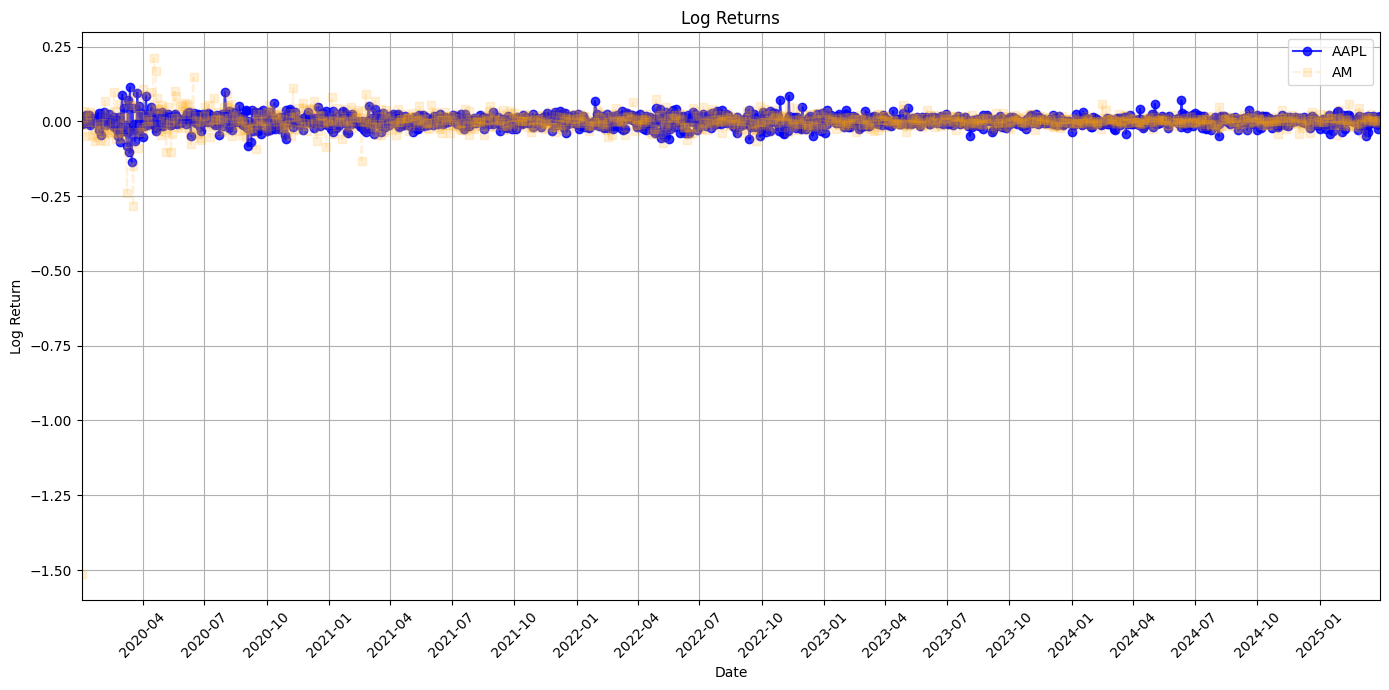

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_log_return.index, aapl_log_return, color='blue', linestyle='-', marker='o', alpha=0.8, label='AAPL')
plt.plot(am_log_return.index, am_log_return, color='orange', linestyle='--', marker='s', alpha=0.15, label='AM')

min_date = min(aapl_log_return.index.min(), am_log_return.index.min())
max_date = max(aapl_log_return.index.max(), am_log_return.index.max())
ax = plt.gca()
ax.set_xlim(min_date, max_date)  # x축 범위 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(am_log_return.describe())
print(aapl_log_return.describe())

count    1317.000000
mean       -0.000006
std         0.050224
min        -1.514258
25%        -0.011166
50%         0.001633
75%         0.012867
max         0.211142
Name: AM_Close, dtype: float64
count    1317.000000
mean        0.000848
std         0.019873
min        -0.137708
25%        -0.008540
50%         0.001156
75%         0.011918
max         0.113157
Name: AAPL_Close, dtype: float64


In [ ]:
aapl_volume=all_concat_volume_df['AAPL_Volume']
am_volume=all_concat_volume_df['AM_Volume']

In [ ]:
print(aapl_volume.describe())
print(am_volume.describe())

count    1.318000e+03
mean     8.886168e+07
std      5.273100e+07
min      2.323470e+07
25%      5.413160e+07
50%      7.481720e+07
75%      1.054047e+08
max      4.265100e+08
Name: AAPL_Volume, dtype: float64
count    1.318000e+03
mean     3.790316e+06
std      2.495919e+06
min      6.206000e+05
25%      2.231375e+06
50%      3.085950e+06
75%      4.500275e+06
max      2.610120e+07
Name: AM_Volume, dtype: float64


In [ ]:
aapl_log_close=all_concat_log_df['AAPL_Close']
aapl_log_close.index = pd.to_datetime(aapl_log_close.index)
am_log_close=all_concat_log_df['AM_Close']
am_log_close.index = pd.to_datetime(am_log_close.index)

nvda_log_close=all_concat_log_df['NVDA_Close']
nvda_log_close.index = pd.to_datetime(nvda_log_close.index)

In [ ]:
type(aapl_log_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

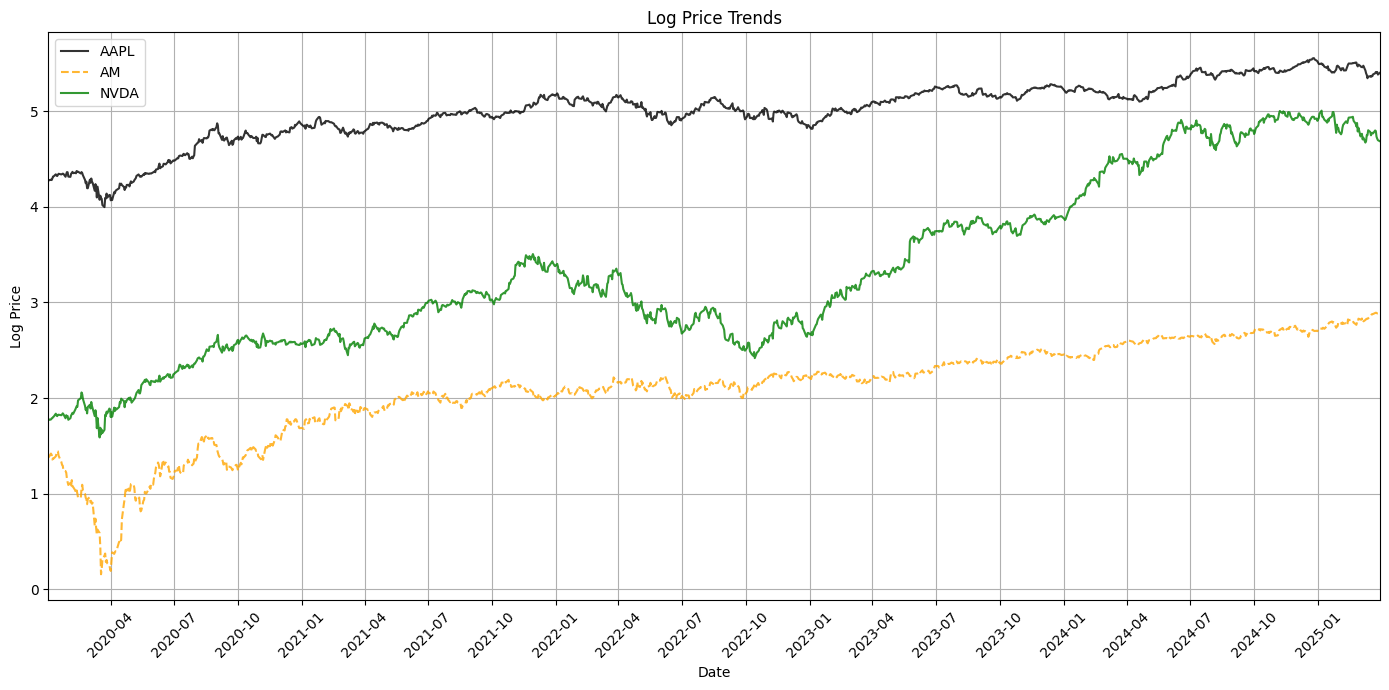

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_log_close.index, aapl_log_close, color='black', linestyle='-', alpha=0.8, label='AAPL')
plt.plot(am_log_close.index, am_log_close, color='orange', linestyle='--', alpha=0.8, label='AM')
plt.plot(nvda_log_close.index, nvda_log_close, color='green', linestyle='-', alpha=0.8, label='NVDA')

min_date = min(aapl_log_close.index.min(), am_log_close.index.min())
max_date = max(aapl_log_close.index.max(), am_log_close.index.max())
ax = plt.gca()
ax.set_xlim(min_date, max_date)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Log Price Trends')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 일반

공적분검정 : 로그수익률을 사용하므로 굳이..? 그래도 정상성 검정을 하면 정상(staionary) 시계열로 나온다

In [ ]:
aapl_log_return[aapl_log_return.isna()]

,AAPL_Close
Date,
2020-01-02,NaN


In [ ]:
result=adfuller(aapl_log_return.dropna(), autolag='AIC')

In [ ]:
if result[1] < 0.05:
  print(f"{result[1]} is stationary")
else:
  print("non-stationary")

3.0028064043581177e-21 is stationary


전략 1: 스프레드 활용, 부호 활용

In [ ]:
print(aapl_log_return.describe())
print(am_log_return.describe())

count    1317.000000
mean        0.000848
std         0.019873
min        -0.137708
25%        -0.008540
50%         0.001156
75%         0.011918
max         0.113157
Name: AAPL_Close, dtype: float64
count    1317.000000
mean       -0.000006
std         0.050224
min        -1.514258
25%        -0.011166
50%         0.001633
75%         0.012867
max         0.211142
Name: AM_Close, dtype: float64


In [ ]:
aapl_am_logchg_spread_df=aapl_log_return-am_log_return
# aapl_am_logchg_spread_df.loc[aapl_am_logchg_spread_df>0]

In [ ]:
aapl_am_logchg_spread_df.describe()

,0
count,1316.000000
mean,-0.000299
std,0.030621
min,-0.224804
25%,-0.014973
50%,-0.001346
75%,0.015661
max,0.259102


In [ ]:
negative_count = (aapl_am_logchg_spread_df < 0).sum()
positive_count = (aapl_am_logchg_spread_df > 0).sum()
print(negative_count)
print(positive_count)

684
632


In [ ]:
type(aapl_am_logchg_spread_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
aapl_am_logchg_spread_df

,0
Date,
2020-01-02,NaN
2020-01-03,-0.016798
2020-01-06,-0.027831
2020-01-07,0.007523
2020-01-08,0.066460
...,...
2025-03-25,0.010814
2025-03-26,-0.007752
2025-03-27,0.015431


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_am_logchg_spread_df.index, aapl_am_logchg_spread_df, color='blue', linestyle='-', marker='o', alpha=0.8, label='AAPL-AM spread')

ax = plt.gca()
ax.set_xlim(aapl_am_logchg_spread_df.index.min(), aapl_am_logchg_spread_df.index.max())  # x축 범위 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Spread of Log Return')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(am_log_return.std())
print(aapl_log_return.std())

0.05022375917724278
0.019872878129261695


In [ ]:
mean=aapl_am_logchg_spread_df.describe().mean
std=aapl_am_logchg_spread_df.describe().std

# 백테스팅 : 일반

In [ ]:
!pip install backtesting --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


전략 1: 스프레드(안정적인 기업(애플) 로그수익률-변동성 큰 기업(소형주, AM) 로그수익률)가 음수면 변동성 큰 기업의 수익률 모멘텀을 받았다고 가정하여 매수, 양수면 모멘텀이 죽었다고 판단하여 매도. & 이미 매수상태에서 스프레드가 여전히 음수라면 홀딩

여기는 거대기업과 소형기업 주가 비교

In [ ]:
all_concat_close_df['AM_Close']

,AM_Close
Date,
2020-01-02,3.959484
2020-01-03,3.987407
2020-01-06,4.132607
2020-01-07,4.082345
2020-01-08,3.881299
...,...
2025-03-25,18.040001
2025-03-26,18.000000
2025-03-27,17.910000


In [ ]:
print(aapl_am_logchg_spread_df.isna().sum())
print(am_log_return.isna().sum())

2
1


In [ ]:
aapl_am_logchg_spread_df.shape

(1318,)

In [ ]:
len(all_concat_close_df['AM_Close'])

1318

In [ ]:
common_index = aapl_am_logchg_spread_df.index.intersection(am_log_return.index)
am_log_return = am_log_return.loc[common_index]
aapl_am_logchg_spread_df = aapl_am_logchg_spread_df.loc[common_index]

In [ ]:
init_cash=1_000_000
cash=init_cash
am_price=all_concat_close_df['AM_Close']
commission=0.002
# iter=aapl_am_logchg_spread_df.reset_index(drop=True)
# trade_ratio=0.5
position=0 # 주식보유수량
equity_curve=[]  # 각 시점의 자산 가치 기록
cash_=[] # 각 시점 별 현금
for idx in range(len(am_price)):
  price=am_price.iloc[idx]
  spread=aapl_am_logchg_spread_df.iloc[idx]

  # 스프레드가 음수이면 전액 매수
  if (spread<0):
    buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
    if buy_qty > 0:
      cost = buy_qty*price*(1+commission)
      cash -= cost
      position += buy_qty
      print(f"{aapl_am_logchg_spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
    else:
      print(f"{aapl_am_logchg_spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
  # 스프레드가 양수이면 전량 매도
  elif (spread>0) and (position>0):
    cash += position*price*(1-commission)
    print(f"{aapl_am_logchg_spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
    position = 0
  else:
    print("포지션 변화 없음")

  cash_.append(cash)
  # 현재 시점 자산
  equity=cash+position*price
  equity_curve.append(equity)
  print(f"스프레드 : {spread}")
  print(f"누적총자산:{equity_curve[idx]}")
  print(f"주식보유수량:{position}, 주식가격{price}")
  print(f"현금보유량:{cash}")
  print()

In [ ]:
equity_curve_series=pd.Series(equity_curve)
total_ret=equity_curve_series.diff()/equity_curve_series.shift(-1)
total_ret

,0
0,NaN
1,-0.001930
2,0.035639
3,-0.014341
4,0.000000
...,...
1313,0.000000
1314,-0.002014
1315,-0.007053
1316,-0.001997


In [ ]:
cum_ret=(1+total_ret).cumprod()
cum_ret

,0
0,NaN
1,0.998070
2,1.033640
3,1.018817
4,1.018817
...,...
1313,0.463329
1314,0.462396
1315,0.459134
1316,0.458217


In [ ]:
if cash_[-1] < init_cash:
  print("손해 ", cash_[-1])
elif cash_[-1] > init_cash:
  print("이득 ", cash_[-1])
else:
  print("그저 그럼 ", cash_[-1])

손해  880814.2844832945


In [ ]:
# 백테스팅 docs : https://kernc.github.io/backtesting.py/doc/backtesting/#gsc.tab=0

class SpreadStrategy(Strategy):
  def init(self):
    pass

  def next(self):
    current_spread = self.data.Spread[-1]

    # 스프레드가 음수이면 소형주 주가의 모멘텀이 높다고 판단하여 매수 신호
    if current_spread < 0:
      # 이미 포지션이 있고 숏 상태라면 청산 후 롱 포지션 진입
      if self.position and self.position.is_short:
        self.position.close()
        self.buy()
      # 포지션이 없다면 바로 매수
      elif not self.position:
        self.buy()

    # 스프레드가 양수이면 매도 신호(혹은 숏 포지션 진입)
    elif current_spread > 0:
      # 이미 포지션이 있고 롱 상태라면 청산 후 숏 포지션 진입
      if self.position and self.position.is_long:
        self.position.close()
        self.sell()
      # 포지션이 없다면 바로 매도
      elif not self.position:
        self.sell()

    # 스프레드가 0이면 특별한 행동은 취하지 않습니다.
    else:
      pass

In [ ]:
dates = aapl_am_logchg_spread_df.dropna().index
data = np.random.randn(aapl_am_logchg_spread_df.dropna().shape[0])

DATA = pd.DataFrame()
DATA['Open']= DATA['High'] = DATA['Low'] = pd.Series(data, index=dates)
DATA['Close'] = am_log_return.dropna() # 거래하고자 하는 기업
DATA['Spread'] = aapl_am_logchg_spread_df.dropna() # 두 기업의 스프레드(기준기업-거래대상기업)
DATA.dropna()

DATA.index = pd.to_datetime(DATA.index)
bt = Backtest(DATA, SpreadStrategy, cash=10000, commission=0.002)
stats = bt.run()
print(stats)
bt.plot()

Backtest.run:   0%|          | 0/1315 [00:00<?, ?bar/s]

AssertionError: 

In [ ]:
# ohlcv = pd.read_csv('AAPL.csv', index_col=0, parse_dates=True)
# bt = Backtest(ohlcv, MyStrategy)

# 전략 1 백테스팅 : 단체 테스트

## 백테스트 함수

In [ ]:
def strategy():
  # 전략 : 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
def group_backtest(init_cash_=1_000_000, commission_=0.002, mat=all_corr_rank_mat):
  test_result_dic={}
  # 백테스팅 세팅
  init_cash=init_cash_ # 투자 시작금
  commission=commission_ # 수수료
  for i in range(mat.shape[1]): # mat : all_corr_rank_mat
    target_ticker=mat.columns[i]
    high,low=mat.T.iloc[i]

    target_log_return=all_concat_log_chg_df[target_ticker]
    high_ticker,high_corr=high
    # low_ticker,low_corr=low
    high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
    # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
    spread_df=target_log_return-high_log_return
    common_index = spread_df.index.intersection(high_log_return.index)
    high_log_return = high_log_return.loc[common_index]
    target_log_return = target_log_return.loc[common_index]

    cash=init_cash
    high_corr_price=all_concat_close_df[high_ticker]
    # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
    # trade_ratio=0.5
    position=0 # 주식보유수량
    equity_curve={}  # 각 시점의 자산 가치 기록
    cash_=[] # 각 시점 별 현금

    # 백테스팅
    for idx in range(len(high_corr_price)):
      price=high_corr_price.iloc[idx]
      spread=spread_df.iloc[idx]

      # 스프레드가 음수이면 전액 매수
      if (spread<0):
        buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
        if buy_qty > 0:
          cost = buy_qty*price*(1+commission)
          cash -= cost
          position += buy_qty
          print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
        else:
          print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
      # 스프레드가 양수이면 전량 매도
      elif (spread>0) and (position>0):
        cash += position*price*(1-commission)
        print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
        position = 0
      else:
        print("포지션 변화 없음")

      cash_.append(cash)
      # 현재 시점 자산
      equity=cash+position*price
      equity_curve[spread_df.index[idx]]=equity
      # print(f"스프레드 : {spread}")
      # print(f"누적총자산:{equity_curve[idx]}")
      # print(f"주식보유수량:{position}, 주식가격{price}")
      # print(f"현금보유량:{cash}")
      # print()
    test_result_dic[target_ticker]={
        'target':target_ticker,
        'high_corr':high_ticker,
        'equity':equity_curve,
    }
  return test_result_dic

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-135-986de46856a6>, line 3)

## 상관계수 높은 애들의 스프레드를 이용해 음수면 매수 양수면 매도

타깃 로그수익률-상관높은 로그수익률이 스프레드인데, 이게 음수라면 상관높은 애들이 수익률이 높다는 것이고, 상대적으로 수익률이 높다는 것이 모멘텀이 있다고 봄

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  high_ticker,high_corr=high
  # low_ticker,low_corr=low
  high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-high_log_return
  common_index = spread_df.index.intersection(high_log_return.index)
  high_log_return = high_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  high_corr_price=all_concat_close_df[high_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'high_corr':high_ticker,
      'equity':equity_curve,
  }

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2021-02-01 00:00:00: 매도 105725주, 가격=4.619999885559082, cash=487473.14
2021-02-02 00:00:00: 매수 104399주, 가격=4.659999847412109, 남은 cash=0.82
2021-02-03 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-04 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-05 00:00:00: 매도 104399주, 가격=4.860000133514404, cash=506365.21
포지션 변화 없음
2021-02-09 00:00:00: 매수 101273주, 가격=4.989999771118164, 남은 cash=2.26
2021-02-10 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-11 00:00:00: 매도 101273주, 가격=5.010000228881836, cash=506365.26
2021-02-12 00:00:00: 매수 98509주, 가격=5.130000114440918, 남은 cash=3.38
2021-02-16 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-17 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-18 00:00:00: 매도 98509주, 가격=5.25, cash=516141.28
포지션 변화 없음
2021-02-22 00:00:00: 매수 94170주, 가격=5.46999979019165, 남은 cash=1.18
2021-02-23 00:00:00: 매도 94170주, 가격=5.449999809265137, cash=512201.21
포지션 변화 없음
포지션 변화 없음
포지션 변화 없음
포지션 변화 없음
2021-03-02 00:00:00: 매수 96086주, 가격=5.320000171661377, 남은 cash=1.32
2021-03-03 00:00:00 : 돈이 없어서

In [ ]:
test_result_dic['GOOGL_Close'].keys()

dict_keys(['target', 'high_corr', 'equity'])

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  high_corr_ticker=test_result_dic[ticker]['high_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:high_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:high_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:high_corr_ticker})


GOOGL_Close에 대하여 GOOG_Close을 거래한 결과 손해. 최종 투자 결과 : 361183.5407887955

AXP_Close에 대하여 JEF_Close을 거래한 결과 손해. 최종 투자 결과 : 318293.1462125355

PG_Close에 대하여 BRK-B_Close을 거래한 결과 손해. 최종 투자 결과 : 548999.203132537

MO_Close에 대하여 PM_Close을 거래한 결과 손해. 최종 투자 결과 : 350538.1660046306

PBR_Close에 대하여 MCK_Close을 거래한 결과 손해. 최종 투자 결과 : 744178.3233804019

AMZN_Close에 대하여 CR_Close을 거래한 결과 손해. 최종 투자 결과 : 777937.6725949245

RTX_Close에 대하여 SN_Close을 거래한 결과 손해. 최종 투자 결과 : 810148.5297353074

AMAT_Close에 대하여 MSFT_Close을 거래한 결과 손해. 최종 투자 결과 : 399480.76507690497

GD_Close에 대하여 CB_Close을 거래한 결과 손해. 최종 투자 결과 : 341233.39983694383

JNJ_Close에 대하여 TD_Close을 거래한 결과 손해. 최종 투자 결과 : 348032.62417746184

GE_Close에 대하여 SMFG_Close을 거래한 결과 손해. 최종 투자 결과 : 320350.6193662508

SONY_Close에 대하여 LTM_Close을 거래한 결과 손해. 최종 투자 결과 : 938565.524148567

SNY_Close에 대하여 PG_Close을 거래한 결과 손해. 최종 투자 결과 : 312656.4739772327

PANW_Close에 대하여 RELX_Close을 거래한 결과 손해. 최종 투자 결과 : 378410.0436759423

CAT_Close에 대하여 PH_Close을 거래한 결과 손해. 최종 투자 결과 : 600674.5242

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

이득 본 기업들 :  21
손해 건수 :  129
아무것도 없는 건수 :  0


In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

이득본 기업들 : 
타깃 회사 : TTE_Close, 트레이딩한 회사 : PR_Close
남긴 돈 : 2510462.769640208

타깃 회사 : SPOT_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1141372.2367867806

타깃 회사 : APD_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1033121.0044314271

타깃 회사 : ISRG_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1137757.9605248787

타깃 회사 : DIS_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1058039.7127394485

타깃 회사 : ADBE_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1009201.127520962

타깃 회사 : FI_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1241319.5312882846

타깃 회사 : CSCO_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1042269.102737335

타깃 회사 : BLK_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1192382.1632456344

타깃 회사 : UNH_Close, 트레이딩한 회사 : RRC_Close
남긴 돈 : 2480900.258220089

타깃 회사 : BMY_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1183022.8331565433

타깃 회사 : BTI_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1403359.8151963053

타깃 회사 : USB_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1059798.7157159578

타깃 회사 : ENB_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1182254.5590512548

타깃 회사 : ABT_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1

## 상관계수 높은 애들의 스프레드를 이용해 음수면 매도 양수면 매수

타깃 로그수익률-상관높은 로그수익률이 스프레드인데, 이게 음수라면 상관높은 애들이 수익률이 너무 높아서 곧 조정 받을 조짐이 있는 것이고 그래서 팔아야 하고, 이게 양수라면 상관높은 애들이 저점에서 올라올 타이밍이라 매수하는 것

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  high_ticker,high_corr=high
  # low_ticker,low_corr=low
  high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-high_log_return
  common_index = spread_df.index.intersection(high_log_return.index)
  high_log_return = high_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  high_corr_price=all_concat_close_df[high_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매도
    if (spread<0)and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    # 스프레드가 양수이면 전량 매수
    elif (spread>0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'high_corr':high_ticker,
      'equity':equity_curve,
  }

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2021-02-01 00:00:00: 매수 203198주, 가격=4.619999885559082, 남은 cash=2.44
2021-02-02 00:00:00: 매도 203198주, 가격=4.659999847412109, cash=945011.28
포지션 변화 없음
포지션 변화 없음
2021-02-05 00:00:00: 매수 194058주, 가격=4.860000133514404, 남은 cash=3.13
2021-02-08 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-09 00:00:00: 매도 194058주, 가격=4.989999771118164, cash=966415.81
포지션 변화 없음
2021-02-11 00:00:00: 매수 192512주, 가격=5.010000228881836, 남은 cash=1.68
2021-02-12 00:00:00: 매도 192512주, 가격=5.130000114440918, cash=985613.09
포지션 변화 없음
포지션 변화 없음
2021-02-18 00:00:00: 매수 187361주, 가격=5.25, 남은 cash=0.55
2021-02-19 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-22 00:00:00: 매도 187361주, 가격=5.46999979019165, cash=1022815.45
2021-02-23 00:00:00: 매수 187297주, 가격=5.449999809265137, 남은 cash=5.3
2021-02-24 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-25 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-26 00:00:00: 매수 1주, 가격=5.25, 남은 cash=0.03
2021-03-01 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-03-02 00:00:00: 매도 187298주, 가격=5.320000171661377

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  high_corr_ticker=test_result_dic[ticker]['high_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:high_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:high_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:high_corr_ticker})


GOOGL_Close에 대하여 GOOG_Close을 거래한 결과 손해. 최종 투자 결과 : 278235.5615743782

AXP_Close에 대하여 JEF_Close을 거래한 결과 손해. 최종 투자 결과 : 600923.8370433133

PG_Close에 대하여 BRK-B_Close을 거래한 결과 손해. 최종 투자 결과 : 341830.05132821534

MO_Close에 대하여 PM_Close을 거래한 결과 손해. 최종 투자 결과 : 505692.89026109193

PBR_Close에 대하여 MCK_Close을 거래한 결과 손해. 최종 투자 결과 : 504985.87934049894

AMZN_Close에 대하여 CR_Close을 거래한 결과 이득. 최종 투자 결과 : 1013853.3318415977

RTX_Close에 대하여 SN_Close을 거래한 결과 이득. 최종 투자 결과 : 1143894.0508883852

AMAT_Close에 대하여 MSFT_Close을 거래한 결과 손해. 최종 투자 결과 : 406571.01692416245

GD_Close에 대하여 CB_Close을 거래한 결과 손해. 최종 투자 결과 : 414727.2273195796

JNJ_Close에 대하여 TD_Close을 거래한 결과 손해. 최종 투자 결과 : 280675.1044766537

GE_Close에 대하여 SMFG_Close을 거래한 결과 손해. 최종 투자 결과 : 446252.46410984226

SONY_Close에 대하여 LTM_Close을 거래한 결과 손해. 최종 투자 결과 : 908063.8106727523

SNY_Close에 대하여 PG_Close을 거래한 결과 손해. 최종 투자 결과 : 316013.24939590413

PANW_Close에 대하여 RELX_Close을 거래한 결과 손해. 최종 투자 결과 : 457899.48712147184

CAT_Close에 대하여 PH_Close을 거래한 결과 손해. 최종 투자 결과 : 363

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

이득 본 기업들 :  20
손해 건수 :  130
아무것도 없는 건수 :  0


In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

이득본 기업들 : 
타깃 회사 : AMZN_Close, 트레이딩한 회사 : CR_Close
남긴 돈 : 1013853.3318415977

타깃 회사 : RTX_Close, 트레이딩한 회사 : SN_Close
남긴 돈 : 1143894.0508883852

타깃 회사 : KKR_Close, 트레이딩한 회사 : JEF_Close
남긴 돈 : 1041470.4506136662

타깃 회사 : SPOT_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1478475.07409835

타깃 회사 : VZ_Close, 트레이딩한 회사 : CR_Close
남긴 돈 : 1128821.3986861403

타깃 회사 : ISRG_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1459608.712560438

타깃 회사 : FIS_Close, 트레이딩한 회사 : CAVA_Close
남긴 돈 : 1345202.437219348

타깃 회사 : UL_Close, 트레이딩한 회사 : CAVA_Close
남긴 돈 : 1411033.1076809831

타깃 회사 : FI_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1359388.2475553975

타깃 회사 : BLK_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1455344.6128800774

타깃 회사 : AMGN_Close, 트레이딩한 회사 : LLY_Close
남긴 돈 : 1007402.5414451275

타깃 회사 : BTI_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1241554.3063609921

타깃 회사 : ENB_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1456080.0411485126

타깃 회사 : MMM_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1077409.050869782

타깃 회사 : ECL_Close, 트레이딩한 회사 : CR_Close
남긴 돈 : 1093384.65

로그수익률 스프레드가 음수일 때 매수 하는 전력과 양수일 때 매수하는 전략에서 이득보는 회사가 조금 다름

# 전략 2 백테스팅 : 단체 테스트

전략 2는 상관계수 서로 음수인 애들로

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  # high_ticker,high_corr=high
  low_ticker,low_corr=low
  # high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-low_log_return
  common_index = spread_df.index.intersection(low_log_return.index)
  low_log_return = low_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  low_corr_price=all_concat_close_df[low_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(low_corr_price)):
    price=low_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'low_corr':low_ticker,
      'equity':equity_curve,
  }

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2021-02-01 00:00:00: 매도 22257주, 가격=38.76610565185547, cash=861099.37
포지션 변화 없음
포지션 변화 없음
2021-02-04 00:00:00: 매수 21970주, 가격=39.11542510986328, 남은 cash=14.75
2021-02-05 00:00:00: 매도 21970주, 가격=39.544124603271484, cash=867061.6
포지션 변화 없음
2021-02-09 00:00:00: 매수 21799주, 가격=39.694969177246094, 남은 cash=20.35
2021-02-10 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-11 00:00:00: 매도 21799주, 가격=39.79023742675781, cash=865672.96
포지션 변화 없음
포지션 변화 없음
2021-02-17 00:00:00: 매수 21957주, 가격=39.34564971923828, 남은 cash=32.7
2021-02-18 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-19 00:00:00: 매도 21957주, 가격=39.15971755981445, cash=858142.96
포지션 변화 없음
포지션 변화 없음
2021-02-24 00:00:00: 매수 21732주, 가격=39.408164978027344, 남은 cash=11.88
2021-02-25 00:00:00: 매도 21732주, 가격=38.68684005737305, cash=839072.81
2021-02-26 00:00:00: 매수 21799주, 가격=38.41434860229492, 남은 cash=3.63
2021-03-01 00:00:00: 매도 21799주, 가격=38.35023498535156, cash=834328.41
포지션 변화 없음
포지션 변화 없음
포지션 변화 없음
포지션 변화 없음
2021-03-08 00:00:0

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  low_corr_ticker=test_result_dic[ticker]['low_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:low_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:low_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:low_corr_ticker})


GOOGL_Close에 대하여 SARO_Close을 거래한 결과 손해. 최종 투자 결과 : 801746.573371277

AXP_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 82459.63928648354

PG_Close에 대하여 ARQT_Close을 거래한 결과 손해. 최종 투자 결과 : 365693.0106154896

MO_Close에 대하여 SAIL_Close을 거래한 결과 이득. 최종 투자 결과 : 1007153.6141946679

PBR_Close에 대하여 IHS_Close을 거래한 결과 손해. 최종 투자 결과 : 289755.83442527655

AMZN_Close에 대하여 SARO_Close을 거래한 결과 손해. 최종 투자 결과 : 794039.8470974227

RTX_Close에 대하여 INTC_Close을 거래한 결과 손해. 최종 투자 결과 : 266049.06564601866

AMAT_Close에 대하여 LTM_Close을 거래한 결과 손해. 최종 투자 결과 : 901420.7593432005

GD_Close에 대하여 IHS_Close을 거래한 결과 손해. 최종 투자 결과 : 332473.03979790595

JNJ_Close에 대하여 ECG_Close을 거래한 결과 손해. 최종 투자 결과 : 869116.8333077703

GE_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 111409.39665876489

SONY_Close에 대하여 ARDT_Close을 거래한 결과 손해. 최종 투자 결과 : 445749.6617294254

SNY_Close에 대하여 FLOC_Close을 거래한 결과 손해. 최종 투자 결과 : 978184.3978498226

PANW_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 126246.47918447608

CAT_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 :

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

이득 본 기업들 :  20
손해 건수 :  130
아무것도 없는 건수 :  0


In [ ]:
all_concat_close_df_corr_mat['TTE_Close'].sort_values(ascending=False)

,TTE_Close
TTE_Close,1.000000
PR_Close,0.964726
XOM_Close,0.953478
ASR_Close,0.951015
PAG_Close,0.941313
...,...
NEOG_Close,-0.799556
CLOV_Close,-0.800830
FIS_Close,-0.814617
PLTK_Close,-0.852604


In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

이득본 기업들 : 
타깃 회사 : MO_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1007153.6141946679

타깃 회사 : TTE_Close, 트레이딩한 회사 : ARQT_Close
남긴 돈 : 1130080.441250357

타깃 회사 : FDX_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1043357.8948737971

타깃 회사 : CB_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1048370.297259804

타깃 회사 : BHP_Close, 트레이딩한 회사 : BKV_Close
남긴 돈 : 1023197.5670980338

타깃 회사 : UL_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1001129.3522668191

타깃 회사 : BTI_Close, 트레이딩한 회사 : SAIL_Close
남긴 돈 : 1068935.016444275

타깃 회사 : PDD_Close, 트레이딩한 회사 : ECG_Close
남긴 돈 : 1085231.9167789991

타깃 회사 : DHR_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1151775.1625271223

타깃 회사 : ZTS_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1068047.844103505

타깃 회사 : SO_Close, 트레이딩한 회사 : FLOC_Close
남긴 돈 : 1014695.4134306984

타깃 회사 : DD_Close, 트레이딩한 회사 : BKV_Close
남긴 돈 : 1044638.6924605863

타깃 회사 : ADM_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1058567.2386518214

타깃 회사 : TMO_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1091933.8095324056

타깃 회사 : MRK_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1123023

## 상관계수 음수면 매도 양수면 매수

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  # high_ticker,high_corr=high
  low_ticker,low_corr=low
  # high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-low_log_return
  common_index = spread_df.index.intersection(low_log_return.index)
  low_log_return = low_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  low_corr_price=all_concat_close_df[low_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(low_corr_price)):
    price=low_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매도
    if (spread<0)and (position>0):
      cash += position*price*(1-commission)
      # print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    # 스프레드가 양수이면 전량 매수
    elif (spread>0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        # print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        # print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    else:
      # print("포지션 변화 없음")
      pass

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'low_corr':low_ticker,
      'equity':equity_curve,
  }

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2021-02-01 00:00:00: 매수 15156주, 가격=38.76610565185547, 남은 cash=31.2
2021-02-02 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-03 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-04 00:00:00: 매도 15156주, 가격=39.11542510986328, cash=591678.92
2021-02-05 00:00:00: 매수 14932주, 가격=39.544124603271484, 남은 cash=25.11
2021-02-08 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-09 00:00:00: 매도 14932주, 가격=39.694969177246094, cash=591564.93
포지션 변화 없음
2021-02-11 00:00:00: 매수 14837주, 가격=39.79023742675781, 남은 cash=16.45
2021-02-12 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-16 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-17 00:00:00: 매도 14837주, 가격=39.34564971923828, cash=582620.31
포지션 변화 없음
2021-02-19 00:00:00: 매수 14848주, 가격=39.15971755981445, 남은 cash=13.94
2021-02-22 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-23 00:00:00 : 돈이 없어서 아무것도 사지 못했다
2021-02-24 00:00:00: 매도 14848주, 가격=39.408164978027344, cash=583976.1
2021-02-25 00:00:00: 매수 15064주, 가격=38.68684005737305, 남은 cash=31.99
2021-02-26 00:00:00: 매도 15064주, 가격=38.41

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  low_corr_ticker=test_result_dic[ticker]['low_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:low_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:low_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:low_corr_ticker})


GOOGL_Close에 대하여 SARO_Close을 거래한 결과 손해. 최종 투자 결과 : 757135.4667712596

AXP_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 220901.62113741017

PG_Close에 대하여 ARQT_Close을 거래한 결과 손해. 최종 투자 결과 : 132893.46899147076

MO_Close에 대하여 SAIL_Close을 거래한 결과 손해. 최종 투자 결과 : 718464.1950887145

PBR_Close에 대하여 IHS_Close을 거래한 결과 손해. 최종 투자 결과 : 210647.32894347195

AMZN_Close에 대하여 SARO_Close을 거래한 결과 손해. 최종 투자 결과 : 789346.1236558646

RTX_Close에 대하여 INTC_Close을 거래한 결과 손해. 최종 투자 결과 : 121299.55928149332

AMAT_Close에 대하여 LTM_Close을 거래한 결과 손해. 최종 투자 결과 : 956898.3256045604

GD_Close에 대하여 IHS_Close을 거래한 결과 손해. 최종 투자 결과 : 170829.73921993637

JNJ_Close에 대하여 ECG_Close을 거래한 결과 손해. 최종 투자 결과 : 697415.2250170215

GE_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 143285.38386653824

SONY_Close에 대하여 ARDT_Close을 거래한 결과 이득. 최종 투자 결과 : 1192843.3067283127

SNY_Close에 대하여 FLOC_Close을 거래한 결과 손해. 최종 투자 결과 : 802046.3796469684

PANW_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과 : 150169.3571188041

CAT_Close에 대하여 WBA_Close을 거래한 결과 손해. 최종 투자 결과

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

이득 본 기업들 :  10
손해 건수 :  140
아무것도 없는 건수 :  0


In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

이득본 기업들 : 
타깃 회사 : SONY_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1192843.3067283127

타깃 회사 : SPOT_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1235463.9998174242

타깃 회사 : ADBE_Close, 트레이딩한 회사 : LTM_Close
남긴 돈 : 1102266.4018437197

타깃 회사 : CMCSA_Close, 트레이딩한 회사 : SN_Close
남긴 돈 : 1045052.4491656907

타깃 회사 : CSCO_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1319518.535690873

타깃 회사 : PLTR_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1170641.238404909

타깃 회사 : NKE_Close, 트레이딩한 회사 : TLN_Close
남긴 돈 : 1637553.8987774958

타깃 회사 : C_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1524500.1282599224

타깃 회사 : INTC_Close, 트레이딩한 회사 : SN_Close
남긴 돈 : 1116669.2066799572

타깃 회사 : SCHW_Close, 트레이딩한 회사 : ARDT_Close
남긴 돈 : 1170169.284764435



# 머신러닝